## Captura y Almacenamiento de Datos - Trabajo 2
# Preprocesamiento Set de Datos IPSA v/s Noticias

8 de Octubre de 2021

### Integrantes:
- Mauricio Bustos
- Marco Cid
- Oscar Jara
- Leonardo Parra

Se prepara un set de datos en formato JSON para un posterior estudio sobre la sensibilidad de valores de cierre del IPSA y análisis textual derivado de noticias publicadas sobre Chile.

In [1]:
# Importación de librerías

import pandas as pd
from newsapi import NewsApiClient
from pprint import pprint
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

## Importación de Datos

### Importación de Noticias

In [2]:
# Inicialización para newsAPI (Usuario deberá crear cuenta en newsapi.org para obtener API Key)

# APIkey = ''

newsapi = NewsApiClient(api_key=APIkey)

In [ ]:
# Función de llamada de API, según palabra clave y fechas de inicio y término

def news_function(key_word, fecha_inicio, fecha_termino):    

    news = []
 

    # En las llamadas se incluye "Chile" para acotar las respuestas de la API ya que en los filtros por país
    # no está disponible Chile.
    
    articles = newsapi.get_everything(q=f'{key_word} Chile',
                                    from_param=fecha_inicio,
                                    to=fecha_termino,
                                    language='es')
    
    total_results = articles['totalResults']

    if total_results >= 100:
        last_page = 5
    else:
        last_page = int(total_results / 20)

    for i in range(1, last_page+1):
        articles = newsapi.get_everything(q=f'{key_word} Chile',
                                    from_param=fecha_inicio,
                                    to=fecha_termino,
                                    language='es',
                                    page=i)

        for article in articles['articles']:
            news.append([article['publishedAt'], article['author'], article['content'], article['source']['name']])

    # Generación de dataframes

    df = pd.DataFrame(news, columns=['fecha_publicacion', 'autor', 'contenido', 'fuente'])

    df['key_word_1'] = key_word
    df['key_word_2'] = 'Chile'

    return df

In [ ]:
# Definición de fechas para cumplir con restricción de API de consulta de máximo 30 días de antiguedad

fecha_termino = datetime.today().date()
fecha_inicio = fecha_termino - relativedelta(days=30)
print('Inicio:', fecha_inicio)
print('Término:', fecha_termino)

In [ ]:
# LLamadas a API con diversas palabras claves relacionadas a estado anímico de incertidumbre

crisis_news = news_function('crisis', fecha_inicio, fecha_termino)
protestas_news = news_function('protestas', fecha_inicio, fecha_termino)
cuarentena_news = news_function('cuarentena', fecha_inicio, fecha_termino)
demandas_news = news_function('demandas', fecha_inicio, fecha_termino)
presidente_news = news_function('presidente', fecha_inicio, fecha_termino)
gobierno_news = news_function('gobierno', fecha_inicio, fecha_termino)
incertidumbre_news = news_function('incertidumbre', fecha_inicio, fecha_termino)
pandemia_news = news_function('pandemia', fecha_inicio, fecha_termino)
elecciones_news = news_function('elecciones', fecha_inicio, fecha_termino)
congreso_news = news_function('congreso', fecha_inicio, fecha_termino)
constitucion_news = news_function('constitución', fecha_inicio, fecha_termino)
advertencia_news = news_function('advertencia', fecha_inicio, fecha_termino)
caida_news = news_function('caída', fecha_inicio, fecha_termino)

In [ ]:
# Unión de los dataframes con información recibida desde API

df_news = pd.concat([crisis_news, protestas_news, cuarentena_news, demandas_news, presidente_news, gobierno_news, incertidumbre_news, pandemia_news, elecciones_news, congreso_news, constitucion_news, advertencia_news, caida_news])

In [ ]:
# Código auxiliar: Exportación de dataset noticias

df_news.to_excel('df_news.xlsx')

In [3]:
# Código auxiliar: Importación de dataset noticias

df_news = pd.read_excel('df_news.xlsx')

In [4]:
# Visualización de registros aleatorios del dataframe

df_news.sample(5)

,Unnamed: 0,fecha_publicacion,autor,contenido,fuente,key_word_1,key_word_2
1197,97,2021-09-24T15:01:03Z,NaN,"Por Froilan Romero_x000D_\n SANTIAGO, 24 sep (...",La Nacion,caída,Chile
325,25,2021-09-20T01:08:24Z,Iván Weissman,¡Buenas y feliz 18! Esta es la última edición ...,Elmostrador.cl,demandas,Chile
1011,31,2021-09-08T16:52:32Z,"RT en Español\n , RT en Español",La Lista del Pueblo representaba una de las pr...,RT,constitución,Chile
612,32,2021-09-20T16:07:53Z,NaN,(Actualiza valores a media sesión)_x000D_\n Po...,La Nacion,incertidumbre,Chile
793,13,2021-10-03T17:23:10Z,The Clinic,La encuesta Plaza Pública Cadem entregó los re...,Theclinic.cl,elecciones,Chile


In [5]:
# Visualización de dimensiones del dataframe

df_news.shape

(1200, 7)

### Importación de IPSA

In [6]:
# Importación de archivo Excel bajado desde sitio del Banco Central de Chile con info de todo el 2021

df_ipsa = pd.read_excel('Canasta_07102021121622.xlsx')
df_ipsa.drop(df_ipsa.index[:3], inplace=True)  # Elimina las primeras 3 filas ya que no corresponden a registros
df_ipsa.columns = ['fecha', 'valor_ipsa']  # Renombra las columnas
df_ipsa['fecha'] = pd.to_datetime(df_ipsa.fecha, format='%Y-%m-%d')  # Mantiene solo la fecha sin mostrar la hora

# Reseteo del index

df_ipsa.reset_index(inplace=True)
del df_ipsa['index']

# Visualización de los primeros registros del df

df_ipsa.head()

,fecha,valor_ipsa
0,2021-01-04,4257.44
1,2021-01-05,4367.18
2,2021-01-06,4417.84
3,2021-01-07,4528.85
4,2021-01-08,4560.02


## Limpieza de Datos

### Missing values en Noticias

In [7]:
# Eliminación de artículos duplicados

df_news.drop_duplicates(subset='contenido', inplace=True)

# Verificación de dimensiones del df sin duplicados

df_news.shape

(834, 7)

In [8]:
# Búsqueda de missing values

df_news.isnull().sum()

Unnamed: 0            0
fecha_publicacion     0
autor                89
contenido             1
fuente                0
key_word_1            0
key_word_2            0
dtype: int64

Se observa un missing value en la columna "contenido" que será eliminado.

In [9]:
# Eliminación de NaN

df_news.dropna(subset=['contenido'], inplace=True)

# Verificación de dimensiones del df sin NaN

df_news.shape

(833, 7)

In [10]:
# Exploración de top 15 fuentes de noticias

df_news['fuente'].value_counts().head(15)

Elmostrador.cl           209
Theclinic.cl             162
La Nacion                 97
RT                        38
Sputnik International     23
BBC News                  23
CNN                       22
Jornada.com.mx            20
Www.abc.es                20
As.com                    16
DW (English)              13
Excelsior.com.mx          13
El Mundo                  12
Publico.es                10
20minutos.es               9
Name: fuente, dtype: int64

Se observa que fuente DW tiene indicación "English". Verificaremos que sus noticias vengan en español

In [11]:
# Visualización de noticias de DW

df_news[df_news['fuente'] == 'DW (English)']

,Unnamed: 0,fecha_publicacion,autor,contenido,fuente,key_word_1,key_word_2
152,52,2021-10-03T00:11:00Z,Deutsche Welle (www.dw.com),El exmandatario de EE. UU. Donald Trump pidió ...,DW (English),protestas,chile
154,54,2021-09-18T12:05:00Z,Deutsche Welle (www.dw.com),Duros enfrentamientos se registraron este sába...,DW (English),protestas,chile
196,96,2021-09-09T13:01:00Z,Deutsche Welle (www.dw.com),Hora de Europa Central\n15:00 | EMA: tercera d...,DW (English),protestas,chile
197,97,2021-09-23T15:33:00Z,Deutsche Welle (www.dw.com),Argumentando que su país estaba ofreciendo un ...,DW (English),protestas,chile
225,25,2021-09-23T16:19:00Z,Deutsche Welle (www.dw.com),El Consejo de la Unión Europea agregó este jue...,DW (English),cuarentena,chile
242,42,2021-10-01T15:54:00Z,Deutsche Welle (www.dw.com),Las autoridades británicas anunciaron este vie...,DW (English),cuarentena,chile
362,62,2021-09-29T16:34:00Z,Deutsche Welle (www.dw.com),Marthe Wandou\nEsta activista por la paz y la ...,DW (English),demandas,chile
666,86,2021-09-17T03:13:00Z,Deutsche Welle (www.dw.com),Miles de migrantes confluyeron este jueves (16...,DW (English),incertidumbre,chile
857,77,2021-10-04T19:54:00Z,Deutsche Welle (www.dw.com),"""Cuando empezamos esta candidatura, parecía qu...",DW (English),elecciones,chile
859,79,2021-09-29T18:48:00Z,Deutsche Welle (www.dw.com),"A pesar del ruido generado, el grupo contrario...",DW (English),elecciones,chile


DW ok. Noticias efectivamente están en español

### Missing values en IPSA

In [12]:
# Búsqueda de valores faltantes

df_ipsa.isnull().sum()

fecha          0
valor_ipsa    84
dtype: int64

Hay 84 valores faltantes en IPSA para el año 2021 debido a que no hay valores para los sábados, domingos y festivos

In [13]:
# Imputación de valores en NaN con valores del día hábil anterior al del día faltante (criterio de negocio)

valor_anterior = df_ipsa['valor_ipsa'][0]
for i in range(1, len(df_ipsa)):
    valor_actual = df_ipsa['valor_ipsa'][i]
    if pd.isna(valor_actual):
        df_ipsa['valor_ipsa'][i] = valor_anterior
    valor_anterior = df_ipsa['valor_ipsa'][i]

df_ipsa.head(10)

<ipython-input-13-84c31e6cb703>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ipsa['valor_ipsa'][i] = valor_anterior


,fecha,valor_ipsa
0,2021-01-04,4257.44
1,2021-01-05,4367.18
2,2021-01-06,4417.84
3,2021-01-07,4528.85
4,2021-01-08,4560.02
5,2021-01-09,4560.02
6,2021-01-10,4560.02
7,2021-01-11,4552.52
8,2021-01-12,4600.12
9,2021-01-13,4658.71


### Outliers en IPSA

Dado que la variable es una serie de tiempo, se considera elaborar un gráfico de líneas e identificar los outliers visualmente.

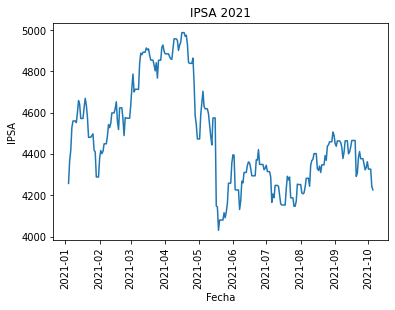

In [14]:
# Visualización de IPSA

plt.plot(df_ipsa['fecha'], df_ipsa['valor_ipsa'])
plt.xlabel('Fecha')
plt.ylabel('IPSA')
plt.title('IPSA 2021')
plt.xticks(rotation=90)
plt.show()

Evolución del IPSA se observa normal en todo el período, no se aprecian outliers

## Transformación

### Agrupación de noticias

In [15]:
# Transformación columna a tipo fecha

df_news['fecha_publicacion'] = pd.to_datetime(df_news['fecha_publicacion']).dt.date

In [16]:
# Creacion de lista con fechas

fechas = sorted(pd.unique(df_news['fecha_publicacion']))

In [17]:
# Agrupación del contenido de las noticias por fecha

contenido_por_fecha = [" "] * len(fechas)  # Lista con espacios por cada fecha presente en df_news

for i in range(len(fechas)):
    for j in range(len(df_news)):
        if fechas[i] == df_news['fecha_publicacion'].iloc[j]:
            contenido_por_fecha[i] = contenido_por_fecha[i] + df_news['contenido'].iloc[j]

In [18]:
# Creación de dataframe con agrupado por fecha

df_agrupado = pd.DataFrame(list(zip(fechas, contenido_por_fecha)), columns =['fecha', 'contenido_noticias']) 

# Revisión de primeros registros del dataframe

df_agrupado.head()

,fecha,contenido_noticias
0,2021-09-06,Una de las principales actividades económicas...
1,2021-09-07,¿Por qué Chile fue escenario de un descontent...
2,2021-09-08,Los sismos a pesar de ser más o menos comunes...
3,2021-09-09,Es evidente que en la sociedad chilena existe...
4,2021-09-10,El Presidente Sebastián Piñera se comprometió...


In [19]:
# Verificación de dimensiones del df

df_agrupado.shape

(31, 2)

### Unión de los sets de datos

In [20]:
# Transformación columna fecha df agrupado a datetime

df_agrupado['fecha'] = pd.to_datetime(df_agrupado['fecha'])

In [21]:
# Unión de ambos df

df_consolidado = df_agrupado.merge(df_ipsa, on='fecha')  # Fechas de noticias prevalecen sobre las del IPSA, por lo
                                                         # que se seleccionan los útimos 30 días de IPSA.

# Selección de columnas

df_consolidado = df_consolidado[['fecha', 'contenido_noticias', 'valor_ipsa']]

# Vista dataframe

df_consolidado

,fecha,contenido_noticias,valor_ipsa
0,2021-09-06,Una de las principales actividades económicas...,4456.2
1,2021-09-07,¿Por qué Chile fue escenario de un descontent...,4432.98
2,2021-09-08,Los sismos a pesar de ser más o menos comunes...,4378.14
3,2021-09-09,Es evidente que en la sociedad chilena existe...,4407.24
4,2021-09-10,El Presidente Sebastián Piñera se comprometió...,4464
5,2021-09-11,<ul><li>Redacción </li><li>Centroamérica Cuen...,4464
6,2021-09-12,"Desde que reconoció su mentira el Pelao Vade,...",4464
7,2021-09-13,Los inversores sienten predilección por los d...,4401.31
8,2021-09-14,Las autoridades sanitarias de Chile reportaro...,4409.42
9,2021-09-15,"Primero, una PSU que sufrió\nuna serie de alt...",4433.84


### Expresiones regulares para formato, números, puntuación y símbolos

Transformación de minúsculas, vocales con tilde, cambio de ñ por nh y eliminación de números y de caracteres especiales.

Se crea una nueva columna con la limpieza realizada, manteniendo data original de respaldo.

In [22]:
# Uso de expresiones regulares para transformaciones

df_consolidado['clean_contenido'] = df_consolidado['contenido_noticias'].str.lower().str.replace('ñ','nh').str.replace('á','a').str.replace('é','e').str.replace('í','i').str.replace('ó','o').str.replace('ú','u').str.replace(r'\d+', ' ', regex = True).str.replace(r'[^a-zA-Z\s]', ' ', regex = True)
print(df_consolidado['clean_contenido'].head())

0     una de las principales actividades economicas...
1      por que chile fue escenario de un descontent...
2     los sismos a pesar de ser mas o menos comunes...
3     es evidente que en la sociedad chilena existe...
4     el presidente sebastian pinhera se comprometi...
Name: clean_contenido, dtype: object


## Tokenización

In [23]:
#Importación de librerías

import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leopa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leopa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
# Tokenización

df_consolidado['contenido_tokens'] = df_consolidado['clean_contenido'].apply(nltk.word_tokenize)

# Revisión de tokens

print(df_consolidado['contenido_tokens'].head())

0    [una, de, las, principales, actividades, econo...
1    [por, que, chile, fue, escenario, de, un, desc...
2    [los, sismos, a, pesar, de, ser, mas, o, menos...
3    [es, evidente, que, en, la, sociedad, chilena,...
4    [el, presidente, sebastian, pinhera, se, compr...
Name: contenido_tokens, dtype: object


### Procesamiento de stopwords

In [25]:
# Definición de stopword en español y revisión

stop_words = set(stopwords.words('spanish'))

print('Tipo Objeto', type(stop_words))

print(stop_words)

Tipo Objeto <class 'set'>
{'suyos', 'hayáis', 'fuésemos', 'fueran', 'hubiese', 'estadas', 'estarían', 'estaban', 'vuestros', 'estuvieran', 'durante', 'habríais', 'suyas', 'estas', 'cuando', 'sentido', 'habré', 'habían', 'eso', 'todos', 'las', 'donde', 'quienes', 'tendrías', 'habréis', 'pero', 'fueses', 'he', 'tendríamos', 'tenían', 'serán', 'nosotros', 'quien', 'han', 'ante', 'esos', 'fuerais', 'sentid', 'o', 'estoy', 'estaremos', 'son', 'estado', 'estuviese', 'teníamos', 'hubiesen', 'sintiendo', 'tenías', 'fue', 'fui', 'hubieran', 'nuestra', 'vuestro', 'habidos', 'e', 'seáis', 'al', 'hubiste', 'les', 'tuvimos', 'estés', 'míos', 'hay', 'estuvieseis', 'estuviera', 'tuvisteis', 'entre', 'uno', 'tuviste', 'tuve', 'está', 'ellos', 'hubiésemos', 'tuyos', 'estuviésemos', 'habrías', 'tendrán', 'estéis', 'era', 'tendré', 'mía', 'estaríamos', 'habríamos', 'con', 'será', 'nos', 'yo', 'habiendo', 'tuvieses', 'serás', 'esa', 'habéis', 'no', 'hubieras', 'estados', 'hubieses', 'habrás', 'tuvieseis',

Dado que en la captura de datos para noticias habíamos agregado la palabara clave "Chile", ahora la eliminamos para que no distorsione los resultados

In [26]:
# Se agrega palabra "chile" al set de stopwords para su posterior eliminación del dataset

stop_words.add('chile')

Como resultado de iteración previa, se identificó en etapa Word Representation la alta presencia de palabras "chars" y "li", por lo que las agregamos al set de stopwords en esta etapa.

In [27]:
# Se agregan palabras "chars" y "li" al set de stopwords para su posterior eliminación del dataset

stop_words.add('chars')
stop_words.add('li')

In [28]:
# Eliminación de stopwords en español

df_consolidado['contenido_tokens_no_stopwords'] = df_consolidado['contenido_tokens'].apply(lambda contenido: [token for token in contenido if token not in stop_words])

# Revisión de cambios

df_consolidado['contenido_tokens_no_stopwords'].head()

0    [principales, actividades, economicas, region,...
1    [escenario, descontento, social, cnn, espanhol...
2    [sismos, pesar, ser, mas, menos, comunes, much...
3    [evidente, sociedad, chilena, existe, crisis, ...
4    [presidente, sebastian, pinhera, comprometio, ...
Name: contenido_tokens_no_stopwords, dtype: object

## Stemming

Stemming para reducir palabras a su raíz gramatical (no se utiliza Lemmatization por tratarse de un set de datos en español)

In [29]:
# Importar librerías

from nltk.stem import SnowballStemmer

In [30]:
# Stemming 

spanish_stemmer = SnowballStemmer('spanish')

df_consolidado['contenido_stem_tokens'] = df_consolidado['contenido_tokens_no_stopwords'].apply(lambda tokens: [spanish_stemmer.stem(t) for t in tokens])

# Revisión del stemming

df_consolidado['contenido_stem_tokens'].head()

0    [principal, activ, econom, region, nhubl, turi...
1    [escenari, descontent, social, cnn, espanhol, ...
2    [sism, pes, ser, mas, men, comun, much, region...
3    [evident, socied, chilen, exist, crisis, confi...
4    [president, sebasti, pinher, comprometi, viern...
Name: contenido_stem_tokens, dtype: object

## Word Representation

In [31]:
# Importación de librería

from wordcloud import WordCloud

No se utiliza variable stemming debido a que la transformación genera pérdida de entendimiento de la palabra original

In [32]:
# Concatenación de texto

text_all = ' '.join(df_consolidado['contenido_tokens_no_stopwords'].str.join(" "))

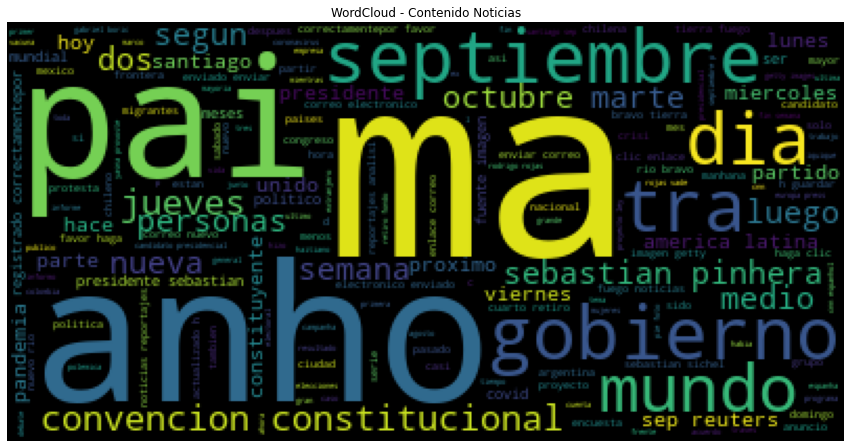

In [33]:
# Generación de word cloud 

wordcloud = WordCloud().generate_from_text(text=text_all)
plt.figure(figsize=(15, 20))
plt.axis("off")
plt.title('WordCloud - Contenido Noticias')
plt.imshow(wordcloud)
plt.show()

### Análisis de Frecuencia

In [34]:
#Importación de librerías

from nltk.probability import FreqDist

In [35]:
# Cálculo de frecuencia de tokens

word_freq_all = FreqDist(word for word in word_tokenize(text_all))

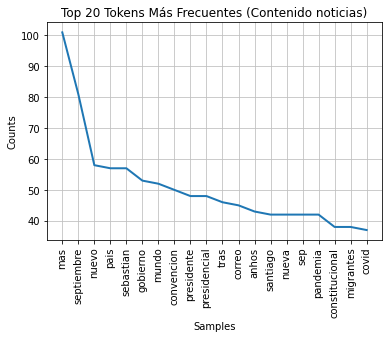

<AxesSubplot:title={'center':'Top 20 Tokens Más Frecuentes (Contenido noticias)'}, xlabel='Samples', ylabel='Counts'>

In [36]:
# Grafico del top N Tokens más frecuentes

n = 20
word_freq_all.plot(n, title = f'Top {n} Tokens Más Frecuentes (Contenido noticias)') 

Se observan algunas diferencias entre las palabras con mayor frecuencia mostradas por el world cloud y las mostradas por el gráfico de frecuencias. Se asume que el gráfico es más preciso.

### Análisis de Longitud de Texto

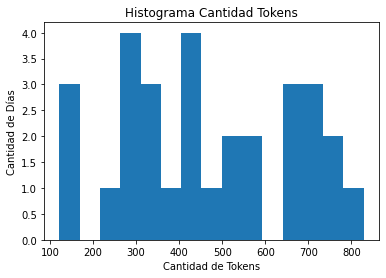

In [37]:
# Histograma cantidad Tokens (Contenido)

plt.hist(df_consolidado['contenido_tokens_no_stopwords'].str.len(), bins=15)
plt.title('Histograma Cantidad Tokens')
plt.xlabel('Cantidad de Tokens')
plt.ylabel('Cantidad de Días')
plt.show()

## Exportación de dataset en formato JSON

In [38]:
import json

In [39]:
# Exportación de dataset en formato JSON

df_consolidado.to_json('IPSA_noticias.json', orient='records')

In [40]:
# Visualización del dataset en JSON exportado

with open('IPSA_noticias.json', 'r') as jsonfile:
    json_data = json.loads(jsonfile.read())
    for element in json_data:
        pprint(element)

{'clean_contenido': ' una de las principales actividades economicas de la '
                    'region de nhuble es el turismo  al ser una zona que '
                    'cuenta con diversos atractivos para conocer y disfrutar  '
                    'rubro que ha resultado particularmente       chars fuente '
                    'de la imagen  getty images\n'
                    'pie de foto  rodrigo rojas \n'
                    ' quiero decir la verdad porque ya no puedo sostener esto  '
                    'la enfermedad que yo tengo no es cancer  es un '
                    'diagnostico que no pude recono      chars libio perez\n'
                    'santiago de chile\n'
                    ' actualizado      \xa0   h\n'
                    'guardar\n'
                    ' noticias relacionadas\n'
                    'no le temo al cancer  menos a la represion    no lucho '
                    'contra el cancer  lucho para pagar la quimio         '
                    'chars mas

------------------------------------------------------